In [1]:
import pandas as pd
import networkx as nx

In [2]:
def get_edge_dict(df, col_to_split, col_to_index):
    df[col_to_split] = df[col_to_split].str.split(r', ')
    df = df.set_index(col_to_index)
    df = df.transpose()
    author_dict = df.to_dict('list')
    author_dict = {key:value[0] for key, value in author_dict.items()}
    return author_dict
    

### Read from author-influence-edge.csv

In [3]:
df_author_edges = pd.read_csv('/home/ignacio/Datasets/BX-CSV-Dump/BX-authors-influence-edge.csv')
df_author_edges.head()

,Authors,influenced
0,Amy Tan,Oakley Hall
1,Ann Beattie,Richard Yates
2,Toni Morrison,"Virginia Woolf, William Faulkner"
3,Harper Lee,"William Faulkner, Truman Capote"
4,Jane Austen,"George Crabbe, Samuel Richardson"


In [4]:
author_dict = get_edge_dict(df=df_author_edges, col_to_index='Authors', col_to_split='influenced')

In [5]:
author_dict

{'Leeson': ['David D. Friedman', 'Bruce L. Benson', 'Peter Boettke'],
 'Russell Banks': ['Jack Kerouac', 'Jack  Kerouac'],
 'P. M.': ['Harold Pinter',
  'William Styron',
  'Ion Dragoumis',
  'Paw Oo Thet',
  'Kuno Fischer',
  'Sir Karl Popper',
  'Karl Popper',
  'Thein Han',
  'Leonard Colebrook',
  'Mirza Mazhar Jan-e-Janaan',
  'Mirzā Mazhar Jān-i Jānān',
  'Juan Donoso Cortés',
  'Syed Ahmed Khan',
  'Ken Kesey',
  'George Casper Homans',
  'George C. Homans',
  'Maggie Laubser',
  'Pierre Carbonnier',
  'Wally Hedrick',
  'Wlad Godzich',
  'Wanda Orlikowski',
  'Wanda J. Orlikowski',
  'George Gurdjieff',
  'Lucien Lévy-Bruhl',
  '(MRIA)',
  'Seamus Heaney',
  'John Montague',
  'William Lane Craig',
  'Pierre Bayle',
  'Louis-Ferdinand Céline',
  'Simon Vouet',
  'Antonie Pannekoek',
  'Henryk Grossman',
  'Franciszek Ksawery Lampi',
  'Hyman Minsky',
  'Plinio Corrêa de Oliveira',
  'Alexis de Tocqueville',
  'Leo Strauss',
  'Joe Klemp',
  'Joseph B. Klemp'],
 'Charles Stross'

### Read from director-influence-edge.csv

In [6]:
df_director_edges = pd.read_csv('/home/ignacio/Datasets/ml-latest-small/ml-directors-influences-edges.csv')
df_director_edges.head()

,Director,Influence
0,John Lasseter,Walt Stanchfield
1,Billy Wilder,Alexander Lernet-Holenia
2,Mel Brooks,"Harry Ritz, Harold Ritz"
3,Oliver Stone,Peter Morgan
4,Martin Scorsese,Morris Engel


In [7]:
director_dict = get_edge_dict(df=df_director_edges, col_to_index='Director', col_to_split='Influence')

### Plot graph

In [8]:
def plot_graph(G, weight_name=None):
    '''
    #G: a networkx G
    #weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    colors = [G[u][v]['color'] for u,v in edges]
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx_edges(G, pos, edge_color=colors);
        #nx.draw_networkx(G, pos, edges=edges, with_labels=True, edge_color='k', width=1.0);


### Social network graph (directors)

In [9]:
g_director = nx.from_dict_of_lists(director_dict)

In [10]:
nx.set_edge_attributes(g_director, 'red', 'color')

In [11]:
nx.set_node_attributes(g_director, 'director', 'type')

<IPython.core.display.Javascript object>


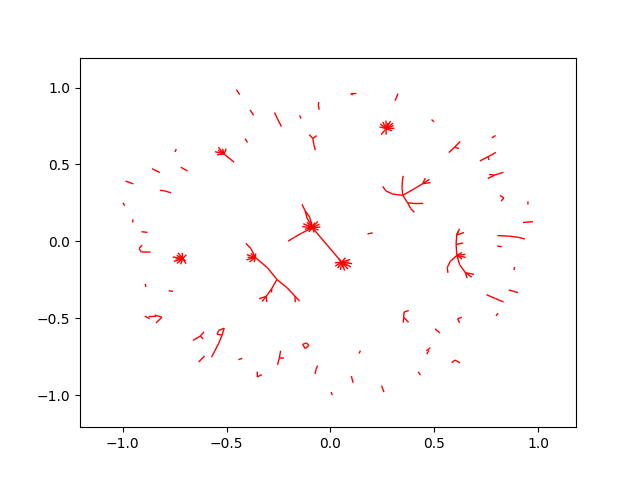

In [12]:
plot_graph(g_director)

In [ ]:
g.nodes()

In [ ]:
nx.shortest_path(g, source='Woody Allen')

In [ ]:
edges = list(g_director.edges())

In [ ]:
color_list = ['green' if i%2 == 0 else 'red' for i in range(len(edges))]

In [ ]:
color_dict = dict(zip(edges, color_list))

In [ ]:
bb = nx.edge_betweenness_centrality(g, normalized=False)

In [ ]:
g_director['Woody Allen']['Groucho Marx']

In [ ]:
g_director['Federico Fellini']

In [ ]:
nx.set_edge_attributes(g, bb, 'betweennes' )

### Social network graph (authors)

In [13]:
g_authors = nx.from_dict_of_lists(author_dict)

In [14]:
nx.set_edge_attributes(g_authors, 'green', 'color')

In [15]:
nx.set_node_attributes(G=g_authors, name='type', values='author')

<IPython.core.display.Javascript object>


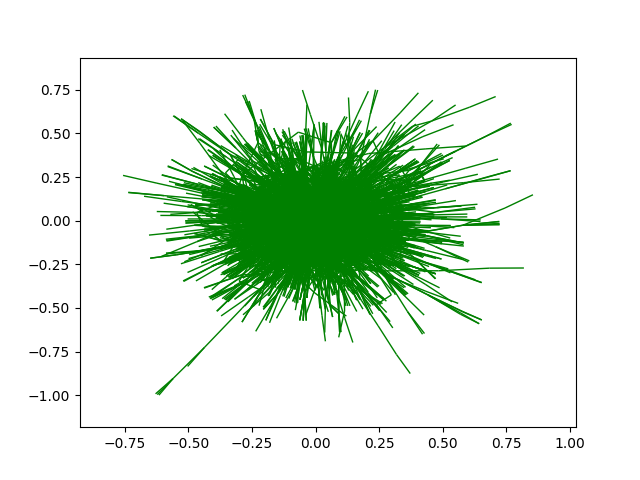

In [33]:
plot_graph(g_authors)

In [25]:
len(g_authors.nodes())

4251

In [27]:
len(g_authors.edges())

7859

In [ ]:
g_authors.nodes()

In [ ]:
nx.shortest_path(g_authors, source='Ingmar Bergman', target='Franz Bopp')

#### Remove outliers

In [19]:
spurius_nodes = ['M','X', 'S', 'F', 'N', 'Na']

In [ ]:
nx.is_connected(g_authors)

In [28]:
largest_cc = max(nx.connected_components(g_authors), key=len)

In [29]:
authors_nodes = list(g_authors.nodes())

In [30]:
len(authors_nodes)

4251

In [31]:
outliers = [x for x in authors_nodes if not (x in largest_cc) ]

In [32]:
g_authors.remove_nodes_from(outliers)

In [24]:
g_authors.remove_nodes_from(spurius_nodes)

In [51]:
g_authors['Woo']

AtlasView({'Richard T. Ely': {'color': 'green'}, 'Peter Kropotkin': {'color': 'green'}, 'Halbert Lynn White': {'color': 'green'}, 'Groucho Marx': {'color': 'green'}, 'George Eliot': {'color': 'green'}, 'Laurence Sterne': {'color': 'green'}, 'Robert Benchley': {'color': 'green'}, 'Richard Hofstadter': {'color': 'green'}, 'Roger Angell': {'color': 'green'}, 'Robert H. Dicke': {'color': 'green'}, 'Robert Henry Dicke': {'color': 'green'}, 'Halbert White': {'color': 'green'}, 'Daniel Defoe': {'color': 'green'}, 'Mort Sahl': {'color': 'green'}, 'Ludwig von Mises': {'color': 'green'}, 'Emil Petaja': {'color': 'green'}})

#### Save authors node cleaned

In [38]:
df_nodes = pd.DataFrame(data=list(g_authors.nodes()), columns=['Authors'])
df_nodes.head()

,Authors
0,N. D. Cocea
1,William Hall
2,Leopold
3,Emanuel Otto Hahn
4,Daphne du Maurier


In [39]:
df_nodes = df_nodes.drop_duplicates()
len(df_nodes)

3481

In [40]:
df_nodes.to_csv('/home/ignacio/Datasets/Graph analysis/authors_nodes.csv', index=False)

### Join graph

In [35]:
g_social = nx.compose(g_authors, g_director, name="Social network")

In [50]:
g_social.node['Woo']

{'type': 'author'}

<IPython.core.display.Javascript object>


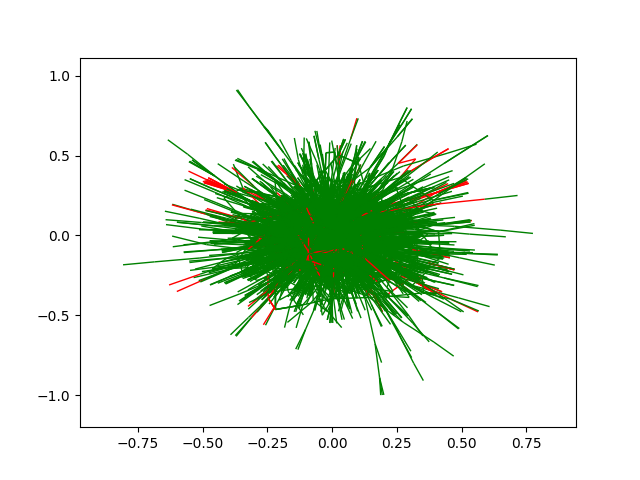

In [48]:
plot_graph(g_social)

In [37]:
nx.shortest_path(g_social, source='Groucho Marx', target='Italo Calvino')

['Groucho Marx', 'Woo', 'Laurence Sterne', 'Italo Calvino']

#### Check graph connectivity and outliers

In [58]:
artist_nodes = list(g_social.nodes())

In [64]:
type_artist[artist_nodes[0]]

'author'

In [52]:
nx.is_connected(g_social)

True

In [41]:
largest_cc = max(nx.connected_components(g_social), key=len)

In [42]:
len(largest_cc)

3548

In [45]:
len(artist_nodes)

3589

In [46]:
outliers = [x for x in artist_nodes if not (x in largest_cc) ]

In [ ]:
len(outliers)

In [47]:
g_social.remove_nodes_from(outliers)

In [ ]:
len(list(g_social.nodes()))

#### Save artist social graph

In [92]:
nx.write_edgelist(g_social, '/home/ignacio/Datasets/Graph analysis/artist_graph.edgelist', data=False, delimiter=',')

#### Save nodes attribute

In [65]:
df_nodes = pd.DataFrame(data=list(g_social.nodes()), columns=['Artists'])
df_nodes.head()

,Artists
0,N. D. Cocea
1,Spencer
2,William Hall
3,Leopold
4,David Steinberg


In [66]:
type_artist = nx.get_node_attributes(g_social, 'type')

In [67]:
df_nodes['type'] = df_nodes['Artists'].apply( lambda x : type_artist[x])
df_nodes.head()

,Artists,type
0,N. D. Cocea,author
1,Spencer,author
2,William Hall,author
3,Leopold,author
4,David Steinberg,director


In [68]:
df_nodes.to_csv('/home/ignacio/Datasets/Graph analysis/artists_nodes.csv', index=False)

#### Save edges attribute

In [82]:
df_edges = pd.DataFrame(data=list(g_social.edges()), columns= ['Node 1', 'Node 2'])
df_edges.head()

,Node 1,Node 2
0,N. D. Cocea,Ion
1,Spencer,Bt
2,Spencer,Auguste Comte
3,Spencer,Sir William Hamilton
4,Spencer,9th Baronet


In [83]:
color_edges = nx.get_edge_attributes(g_social, 'color')

In [90]:
df_edges['color'] = df_edges.apply(lambda x : color_edges[(x['Node 1'], x['Node 2'])], axis=1 ) 
df_edges.head()

,Node 1,Node 2,color
0,N. D. Cocea,Ion,green
1,Spencer,Bt,green
2,Spencer,Auguste Comte,green
3,Spencer,Sir William Hamilton,green
4,Spencer,9th Baronet,green


In [91]:
df_edges.to_csv('/home/ignacio/Datasets/Graph analysis/artists_edges.csv', index=False)

In [ ]:
df_nodes[df_nodes['Artists'] == 'S']

In [ ]:
df_edges = nx.to_pandas_edgelist(g_social)
df_edges.head()

In [ ]:
df_edges.to_csv('/home/ignacio/Datasets/Graph analysis/artists_edges.csv')

In [ ]:
df_edges[df_edges['source'] == 'Ingmar Bergman']